In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf

pyo.init_notebook_mode(connected=True)

In [3]:
end = dt.datetime.now()
start = dt.datetime(2024,1,1)

start, end

(datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2025, 7, 10, 15, 55, 9, 425729))

In [5]:
apple = yf.Ticker('AAPL')

df = apple.history(start=start, end=end)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,185.789438,187.070068,182.553143,184.290421,82488700,0.0,0.0
2024-01-03 00:00:00-05:00,182.880742,184.528677,182.096477,182.910522,58414500,0.0,0.0
2024-01-04 00:00:00-05:00,180.825785,181.758954,179.565029,180.587540,71983600,0.0,0.0
2024-01-05 00:00:00-05:00,180.666963,181.431354,178.860187,179.862839,62303300,0.0,0.0
2024-01-08 00:00:00-05:00,180.766224,184.250716,180.180517,184.210999,59144500,0.0,0.0


In [7]:
df['MA50'] = df['Close'].rolling(window=10, min_periods=0).mean()

In [9]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50
Date,,,,,,,,
2024-01-02 00:00:00-05:00,185.789438,187.070068,182.553143,184.290421,82488700,0.0,0.0,184.290421
2024-01-03 00:00:00-05:00,182.880742,184.528677,182.096477,182.910522,58414500,0.0,0.0,183.600471
2024-01-04 00:00:00-05:00,180.825785,181.758954,179.565029,180.587540,71983600,0.0,0.0,182.596161
2024-01-05 00:00:00-05:00,180.666963,181.431354,178.860187,179.862839,62303300,0.0,0.0,181.912830
2024-01-08 00:00:00-05:00,180.766224,184.250716,180.180517,184.210999,59144500,0.0,0.0,182.372464


In [11]:
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
Date,,,,,,,,,
2024-01-02 00:00:00-05:00,185.789438,187.070068,182.553143,184.290421,82488700,0.0,0.0,184.290421,184.290421
2024-01-03 00:00:00-05:00,182.880742,184.528677,182.096477,182.910522,58414500,0.0,0.0,183.600471,183.600471
2024-01-04 00:00:00-05:00,180.825785,181.758954,179.565029,180.587540,71983600,0.0,0.0,182.596161,182.596161
2024-01-05 00:00:00-05:00,180.666963,181.431354,178.860187,179.862839,62303300,0.0,0.0,181.912830,181.912830
2024-01-08 00:00:00-05:00,180.766224,184.250716,180.180517,184.210999,59144500,0.0,0.0,182.372464,182.372464


In [13]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
    vertical_spacing=0.1, subplot_titles=('AAPL', 'Volume'),
    row_width=[0.2,0.7])

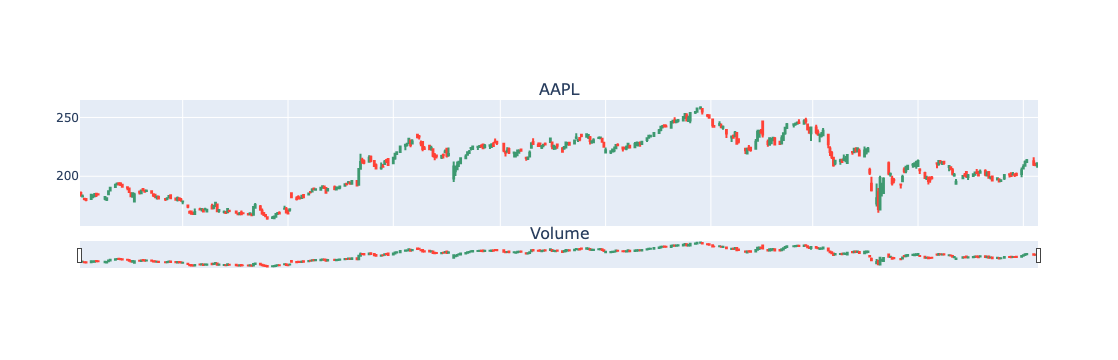

In [15]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC'), row=1, col=1)

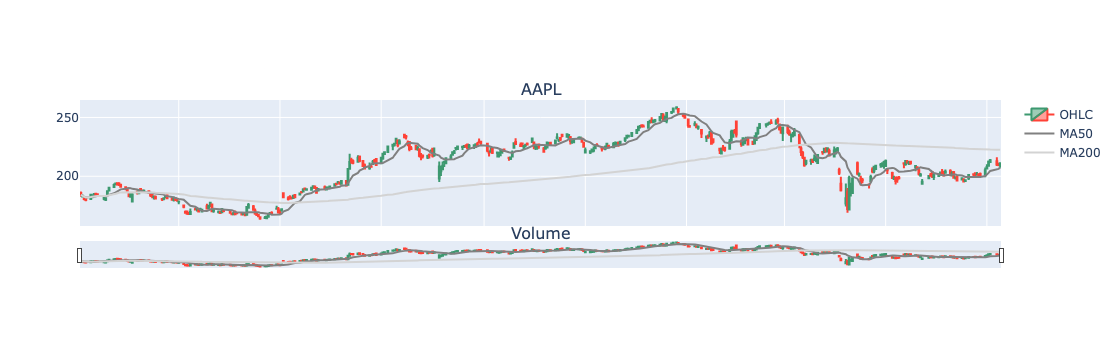

In [17]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'), row=1, col=1)

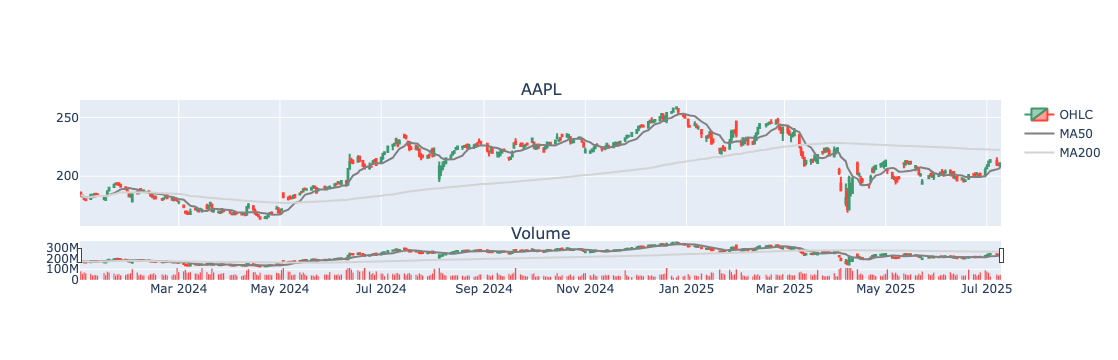

In [19]:
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

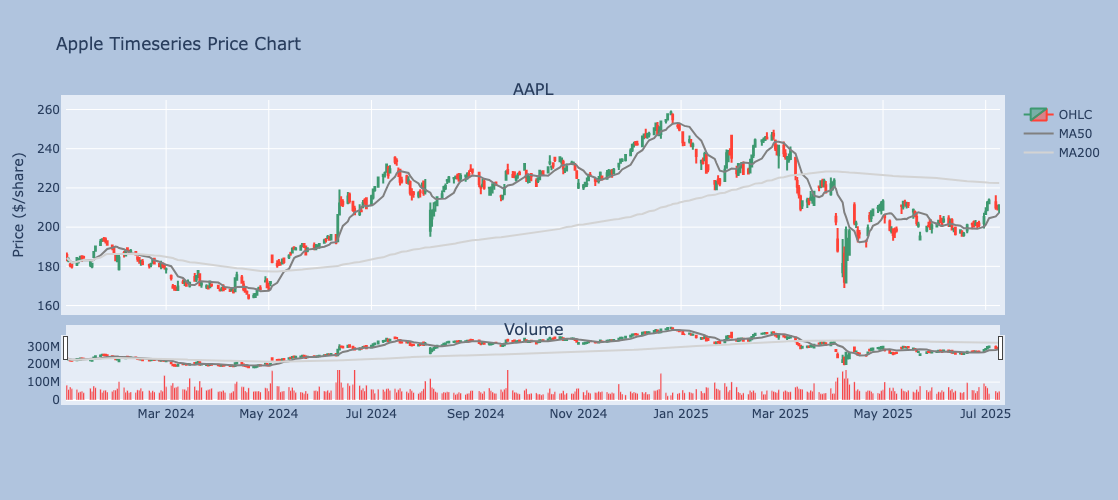

In [21]:
fig.update_layout(
    title = 'Apple Timeseries Price Chart',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price ($/share)',
        titlefont_size = 14,
        tickfont_size = 12 
        ),
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=5),
    paper_bgcolor='LightSteelBlue'
)

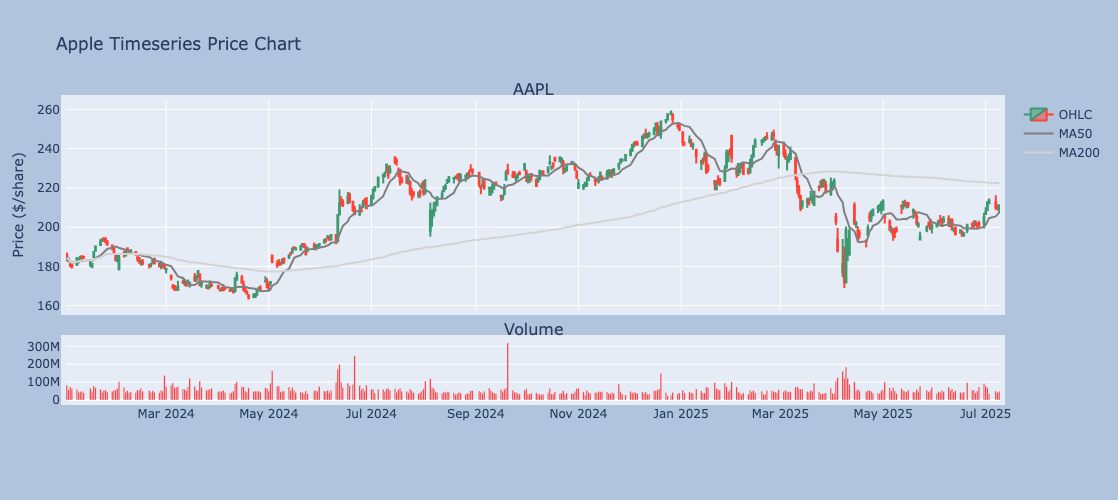

In [23]:
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()